# 1) Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data set

In [2]:
df = pd.read_csv('spam.tsv',sep='\t')

In [3]:
df.head()
#df.info()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# check null values in dataset
df.isnull().sum()
# no null values in dataset

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
# check number of the label column, i.e., ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
# 4825 messages are legitimate that is ham
# and 747 messages are spam messages
#hence this is a very unbalanced datasets

In [7]:
df['label'].value_counts()/ len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
#here 86% of data are ham anf 13% data are spam

## Balancing the data

In [8]:
# select ham data
ham = df[df['label']=='ham']
ham.head()
ham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4825 non-null   object
 1   message  4825 non-null   object
 2   length   4825 non-null   int64 
 3   punct    4825 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 188.5+ KB


In [9]:
# select spam data
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
# check the shape of data
ham.shape, spam.shape
# here ham and spam is a dataframe or 2D array

((4825, 4), (747, 4))

In [ ]:
# now we have to select 747 samples from ham to balance the data. Here sample function will fetch 747 records

In [11]:
spam.shape[0] # output = no of samples in spam data

747

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
# check the shape of data
ham.shape, spam.shape

# size of ham and spam data is same, now this is the balenced data

((747, 4), (747, 4))

In [ ]:
#dataframe.append() function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object

In [14]:
# append spam data into ham data
data = ham.append(spam,ignore_index=True)

C:\Users\skuma\AppData\Local\Temp\ipykernel_7380\1241042734.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam,ignore_index=True)


In [18]:
data.head()
# at the starting we have all the ham data

,label,message,length,punct
0,ham,"Yeah there's quite a bit left, I'll swing by t...",67,3
1,ham,This is my number by vivek..,28,2
2,ham,Finally it has happened..! Aftr decades..! BEE...,135,15
3,ham,Ok . . now i am in bus. . If i come soon i wil...,71,4
4,ham,Hi this is yijue... It's regarding the 3230 te...,121,13


In [15]:
data.tail()
# at the end we have all the spam data

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [16]:
data.shape # final shape of the data

(1494, 4)

## Data Visualization

In [ ]:
#Histogram:- A histogram is a graph showing frequency distributions.

#It the number of observations within each given interval.
#If bins is an integer, it defines the number of equal-width bins in the range.

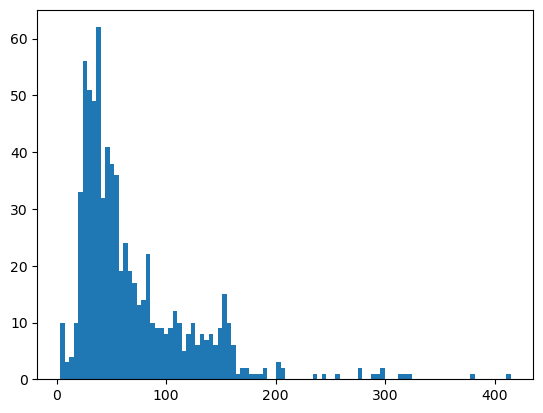

In [18]:
# plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'], bins=100)
plt.show()
#The towers or bars of a histogram are called bins. 
#The height of each bin shows how many values from that data fall into that range. 
# from the histogram we can say that, the number of charactors in ham messages are less than 100

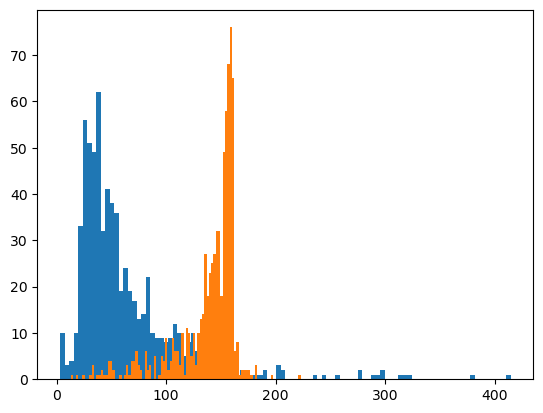

In [19]:
# plot histogram of length for ham and spam both
plt.hist(data[data['label']=='ham']['length'], bins=100)
plt.hist(data[data['label']=='spam']['length'], bins=100)
plt.show()

In [24]:
# It looks like there's a small range of values where a message is more likely to be spam than ham

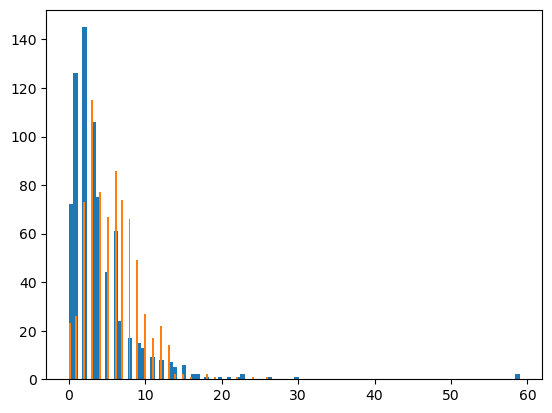

In [21]:
# plot histogram of punct for ham and spam both
plt.hist(data[data['label']=='ham']['punct'], bins=100)
plt.hist(data[data['label']=='spam']['punct'], bins=100)
plt.show()

In [ ]:
# here we are not getting more information

## Split the data into train & test sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3,
                                                    random_state=0, shuffle=True)

In [22]:
len(x_train)

1045

In [23]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

# 2) Building the Model (Random Forest)

In [ ]:
#TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features

In [25]:
from sklearn.pipeline import Pipeline
# there will be lot of repeated processes for training and testing the dataset separately,
# to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
# we are importing TfidfVectorizer to utilize bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',RandomForestClassifier(n_estimators=100))])

In [28]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# all the parameters that you can see while training the model are the default parameters

# 3) Predicting the results (Random Forest)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score, f1_score 

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[220,   7],
       [ 21, 201]], dtype=int64)

In [37]:
# ham and spam
# spam and ham

In [45]:
# classification_report
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
#precision_score(y_test, y_pred)
#recall_score(y_test, y_pred)
#f1_score(y_test, y_pred)
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       227
        spam       0.97      0.91      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



0.9376391982182628

In [35]:
accuracy_score(y_test, y_pred)
# 94.5% accuracy

0.9532293986636972

In [46]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [47]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [48]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)

# 4) Building the model (SVM)

In [49]:
from sklearn.svm import SVC

In [50]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',SVC(C=100,gamma='auto'))])

In [51]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [52]:
y_pred = classifier.predict(x_test)

In [53]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 20, 202]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [55]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [56]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [57]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)